# Reddit posts sentiment analysis

In [1]:
import warnings
warnings.filterwarnings('ignore')

import os
dir_Path = 'D:\\College\\NLP\\SentimentAnalysis'
os.chdir(dir_Path)

## Data Facts and Import 

In [2]:
import pandas as pd 
Postdata = pd.read_csv('RedditData.csv')

In [3]:
Postdata.shape

(119998, 2)

In [4]:
Postdata.head()

,redditpost,category
0,When modi promised minimum government maximum ...,-1
1,Talk all the nonsense and continue all the dra...,0
2,what did just say vote for modi welcome bjp t...,1
3,asking his supporters prefix chowkidar their n...,1
4,answer who among these the most powerful world...,1


In [5]:
Postdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119998 entries, 0 to 119997
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   redditpost  119998 non-null  object
 1   category    119998 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.8+ MB


In [6]:
Postdata.describe()

,category
count,119998.000000
mean,0.228037
std,0.780352
min,-1.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


## Data Cleaning / EDA

In [7]:
### Checking Missing values in the csv file

count = Postdata.isnull().sum().sort_values(ascending=False)
percentage = ((Postdata.isnull().sum()/len(Postdata)*100)).sort_values(ascending=False)
missing_data = pd.concat([count, percentage], axis=1,
keys=['Count','Percentage'])

print('Count and percentage of missing values for the columns:')

missing_data

Count and percentage of missing values for the columns:


,Count,Percentage
redditpost,0,0.0
category,0,0.0


Percentage for category

 1    44.45
 0    33.91
-1    21.65
Name: category, dtype: float64


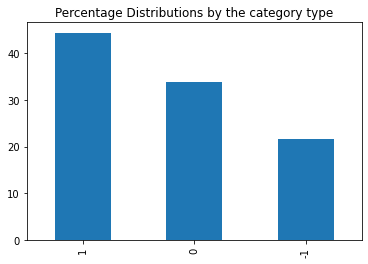

In [8]:
### Checking for the Distribution of Category ###
import matplotlib.pyplot as plt
%matplotlib inline
print('Percentage for category\n')
print(round(Postdata.category.value_counts(normalize=True)*100,2))
round(Postdata.category.value_counts(normalize=True)*100,2).plot(kind='bar')
plt.title('Percentage Distributions by the category type')
plt.show()

In [9]:
Postdata.head(10)

,redditpost,category
0,When modi promised minimum government maximum ...,-1
1,Talk all the nonsense and continue all the dra...,0
2,what did just say vote for modi welcome bjp t...,1
3,asking his supporters prefix chowkidar their n...,1
4,answer who among these the most powerful world...,1
5,kiya tho refresh maarkefir comment karo,0
6,surat women perform yagna seeks divine grace f...,0
7,this comes from cabinet which has scholars lik...,0
8,with upcoming election india saga going import...,1
9,gandhi was gay does modi,1


In [10]:
# First level cleaning
import re
import string

#This function converts to lower-case, removes square bracket, removes numbers and punctuation
def text_clean_1(text):
    
    #Convert the text to lower
    text = text.lower()
    
    #Remove the brackets
    text = re.sub('\[.*?\]', '', text)
    
    #Remove the punctuations
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    
    #Remove the digits
    text = re.sub('\w*\d\w*', '', text)
    
    return text

cleaned1 = lambda x: text_clean_1(x)

In [11]:
# Updated text
Postdata['cleaned_post_data'] = pd.DataFrame(Postdata.redditpost.apply(cleaned1))
Postdata.head(10)

,redditpost,category,cleaned_post_data
0,When modi promised minimum government maximum ...,-1,when modi promised minimum government maximum ...
1,Talk all the nonsense and continue all the dra...,0,talk all the nonsense and continue all the dra...
2,what did just say vote for modi welcome bjp t...,1,what did just say vote for modi welcome bjp t...
3,asking his supporters prefix chowkidar their n...,1,asking his supporters prefix chowkidar their n...
4,answer who among these the most powerful world...,1,answer who among these the most powerful world...
5,kiya tho refresh maarkefir comment karo,0,kiya tho refresh maarkefir comment karo
6,surat women perform yagna seeks divine grace f...,0,surat women perform yagna seeks divine grace f...
7,this comes from cabinet which has scholars lik...,0,this comes from cabinet which has scholars lik...
8,with upcoming election india saga going import...,1,with upcoming election india saga going import...
9,gandhi was gay does modi,1,gandhi was gay does modi


In [12]:
# Apply a second round of cleaning
def text_clean_2(text):
    
    #Replacing quotes with blanks
    text = re.sub('[‘’“”…]', '', text)
    
    #Replacing new lines with blank
    text = re.sub('\n', '', text)
    return text

cleaned2 = lambda x: text_clean_2(x)

In [13]:
# Let's take a look at the updated text
Postdata['cleaned_data'] = pd.DataFrame(Postdata['cleaned_post_data'].apply(cleaned2))
Postdata.head(10)

,redditpost,category,cleaned_post_data,cleaned_data
0,When modi promised minimum government maximum ...,-1,when modi promised minimum government maximum ...,when modi promised minimum government maximum ...
1,Talk all the nonsense and continue all the dra...,0,talk all the nonsense and continue all the dra...,talk all the nonsense and continue all the dra...
2,what did just say vote for modi welcome bjp t...,1,what did just say vote for modi welcome bjp t...,what did just say vote for modi welcome bjp t...
3,asking his supporters prefix chowkidar their n...,1,asking his supporters prefix chowkidar their n...,asking his supporters prefix chowkidar their n...
4,answer who among these the most powerful world...,1,answer who among these the most powerful world...,answer who among these the most powerful world...
5,kiya tho refresh maarkefir comment karo,0,kiya tho refresh maarkefir comment karo,kiya tho refresh maarkefir comment karo
6,surat women perform yagna seeks divine grace f...,0,surat women perform yagna seeks divine grace f...,surat women perform yagna seeks divine grace f...
7,this comes from cabinet which has scholars lik...,0,this comes from cabinet which has scholars lik...,this comes from cabinet which has scholars lik...
8,with upcoming election india saga going import...,1,with upcoming election india saga going import...,with upcoming election india saga going import...
9,gandhi was gay does modi,1,gandhi was gay does modi,gandhi was gay does modi


## Model training 

In [14]:
from sklearn.model_selection import train_test_split

#Independent variable
Independent_var = Postdata.cleaned_data

#Target variable
Dependent_var = Postdata.category

IV_train, IV_test, DV_train, DV_test = train_test_split(Independent_var, Dependent_var, test_size = 0.1, random_state = 225)

print('IV_train :', len(IV_train))
print('IV_test  :', len(IV_test))
print('DV_train :', len(DV_train))
print('DV_test  :', len(DV_test))


IV_train : 107998
IV_test  : 12000
DV_train : 107998
DV_test  : 12000


In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

tvec = TfidfVectorizer()
clf2 = LogisticRegression(solver = "lbfgs")


from sklearn.pipeline import Pipeline

In [16]:
model = Pipeline([('vectorizer',tvec),('classifier',clf2)])

model.fit(IV_train, DV_train)


from sklearn.metrics import confusion_matrix

predictions = model.predict(IV_test)

confusion_matrix(predictions, DV_test)

array([[2099,   34,  177],
       [ 215, 3981,  212],
       [ 313,   74, 4895]], dtype=int64)

## Model prediciton 

In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print("Accuracy : ", accuracy_score(predictions, DV_test))
print("Precision : ", precision_score(predictions, DV_test, average = 'weighted'))
print("Recall : ", recall_score(predictions, DV_test, average = 'weighted'))

Accuracy :  0.9145833333333333
Precision :  0.9192029539114785
Recall :  0.9145833333333333


## Testing the model

In [29]:
example = ["I am very happy today"]
result = model.predict(example)

print(result)
if(result == [1]):
    print("The sentiment is positive")
elif(result == [0]):
    print("The sentiment is neutral")
else:
    print("The sentiment is negative")
# -1 is negative sentiment
#  0 is neutral sentiment
#  1 is Positive sentiment

[0]
The sentiment is neutral
